# Air Pollution Prediction (Use Case) - SENEM AKTAŞ

### Goal : It is expected that the most successful model, which makes the most comprehensive assessment for predicting next hour air pollution using the data, is expected.

### Dataset Link: https://archive.ics.uci.edu/ml/datasets/Beijing+Multi-Site+Air-Quality+Data

In [40]:
from IPython.display import Image
Image(url="quality.png", width = 500, height = 200)

# 1- Read And Examine Dataset CSV 

### 1-A: Reading Dataset

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
#df = pd.read_csv("pollution.csv", parse_dates=True, index_col = "hour")

df= pd.read_csv("pollution.csv") # reading csv which include our dataset
print(df.shape)  #shape of the dataset - number of rows and columns

df #reading dataset and print to screen

(43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


### Plot the "pm2.5: PM2.5 concentration (pollution)" column. We need to look them and predict future air pollution. 

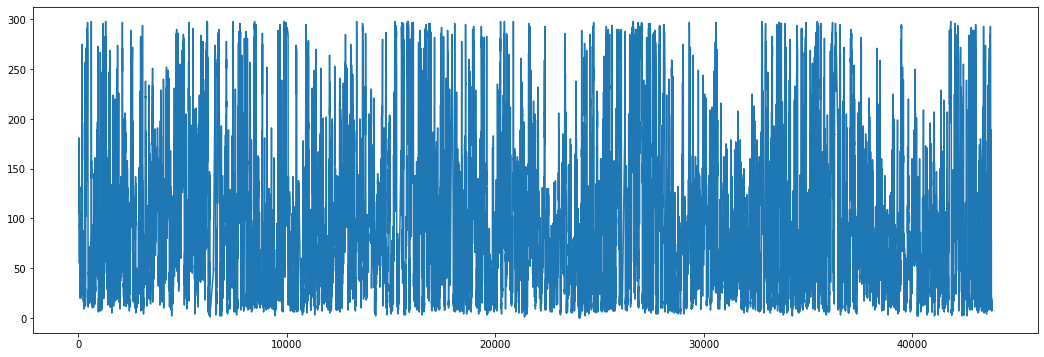

In [26]:
df['pm2.5'].plot(figsize=(18, 6))

### Plot all the other columns as well in a plot to examine the curves of all of them at the same time.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f7780398dd0>,
      dtype=object)

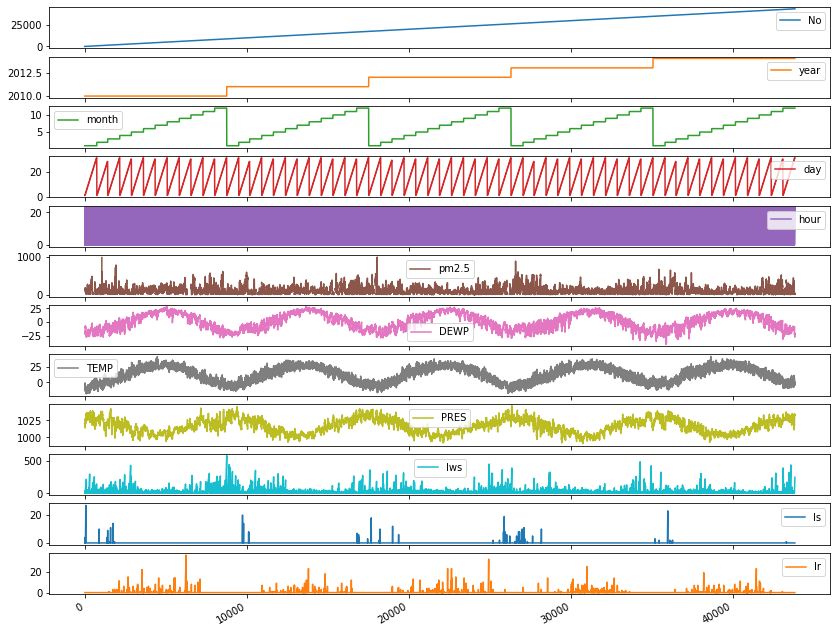

In [21]:
df.plot(subplots=True, figsize=(14,12))

# 2- Preprocessing Dataset

### We can see that the dataset looks like time series data as it has day hour month and year. We must convert our dates into a standard format. So, we convert these columns into a timestamp.

In [29]:
import datetime

df['hour'] = df['hour'].replace(24,0)
df['DateTime'] = df[['year', 'month', 'day', 'hour']].apply(lambda s : datetime.datetime(*s),axis = 1)
df['DateTime'] = pd.to_datetime(df['DateTime'])
#df['DateTime'] = df.DateTime.values.astype(np.int64) // 10 ** 9 

df

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,DateTime
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0,2014-12-31 19:00:00
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0,2014-12-31 20:00:00
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0,2014-12-31 21:00:00
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0,2014-12-31 22:00:00


### We maintain "DateTime" column in the previous block. Now we can remove the unwanted columns. Removing 'No' column, as it is not relevant.

In [30]:
try:
  df.drop('No',axis = 1,inplace= True)
  df.drop('year',axis = 1,inplace= True)
  df.drop('month',axis = 1,inplace= True)
  df.drop('day',axis = 1,inplace= True)
  df.drop('hour',axis = 1,inplace= True)
  print(df.shape)
except:
  print(df.shape)
  #print("Already Done")

df = df.sort_values(by='DateTime',ascending=True)

df = df.set_index('DateTime') # define DateTime columns as a index

df.head(3)

(43824, 9)


,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
DateTime,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0


### Calculation Null Values- As a result, we could see there are 2067 NA values for pm2.5 column. This column is our target column. Because of its importance we should not remove easily Null values.

# na degerlerini isle---------------------------------------------------

In [14]:
print("Null values:\n\n",df.isnull().sum())
#Remvoing Null values
#df = df.dropna()
#print("\nNull values:\n\n",df.isnull().sum())

Null values:

 pm2.5       2067
DEWP           0
TEMP           0
PRES           0
cbwd           0
Iws            0
Is             0
Ir             0
DateTime       0
dtype: int64


### Finding and Removing Outliers- neden bunu yapmalıyız

In [15]:
print("Shape of dataframe before removing outliers",df.shape)

Q1=df['pm2.5'].quantile(0.25)
Q3=df['pm2.5'].quantile(0.75)
IQR=Q3-Q1
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR

df = df[df['pm2.5'] < Upper_Whisker]

print("\nShape of dataframe after removing outliers",df.shape)

Shape of dataframe before removing outliers (43824, 9)

Shape of dataframe after removing outliers (39960, 9)


### Checking correlations between the independent variables- neden

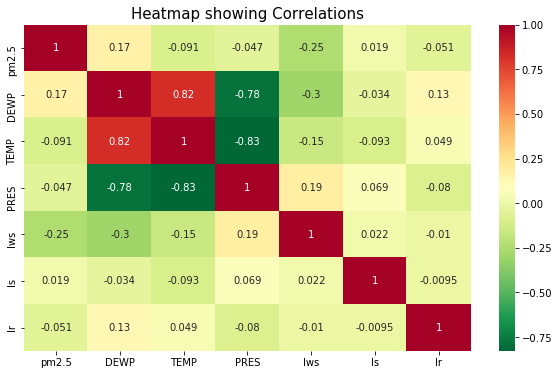

,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
pm2.5,1.000000,0.171423,-0.090534,-0.047282,-0.247784,0.019266,-0.051369
DEWP,0.171423,1.000000,0.824633,-0.778346,-0.296399,-0.034410,0.125090
TEMP,-0.090534,0.824633,1.000000,-0.826690,-0.154623,-0.092601,0.049121
PRES,-0.047282,-0.778346,-0.826690,1.000000,0.185355,0.069028,-0.079843
Iws,-0.247784,-0.296399,-0.154623,0.185355,1.000000,0.021883,-0.010122
Is,0.019266,-0.034410,-0.092601,0.069028,0.021883,1.000000,-0.009548
Ir,-0.051369,0.125090,0.049121,-0.079843,-0.010122,-0.009548,1.000000


In [31]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='RdYlGn_r',annot=True)
plt.title('Heatmap showing Correlations',size=15)
plt.show()

df.corr()

### Temp is highly correlated with pressure and dew_point_temp as the correlation coefficient is more than 0.8. So removing Temp. Also removing pressure since it is also highly correlated with dew_point_temp. Temp is highly correlated with pressure and dew_point_temp as the correlation coefficient is more than 0.8. So removing Temp. Also removing pressure since it is also highly correlated with dew_point_temp.

                     pm2.5  DEWP cbwd    Iws  Is  Ir
DateTime                                            
2010-01-01 00:00:00    NaN   -21   NW   1.79   0   0
2010-01-01 01:00:00    NaN   -21   NW   4.92   0   0
2010-01-01 02:00:00    NaN   -21   NW   6.71   0   0
2010-01-01 03:00:00    NaN   -21   NW   9.84   0   0
2010-01-01 04:00:00    NaN   -20   NW  12.97   0   0


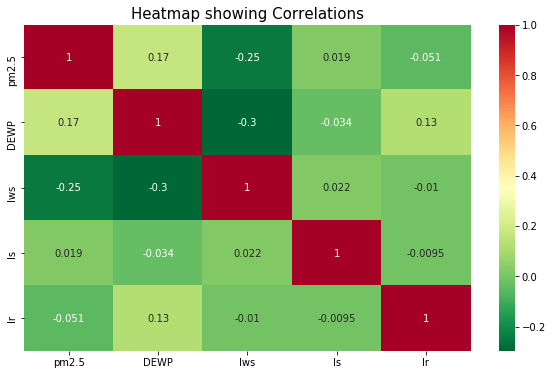

In [32]:
try:
  df.drop(['TEMP','PRES'],axis = 1,inplace= True)
except:
  print('Already Dropped')
print(df.head())

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='RdYlGn_r',annot=True)
plt.title('Heatmap showing Correlations',size=15)
plt.show()

### Visualisaiton The Last Dataset and see how it looks

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0c82c3b1d0>,
      dtype=object)

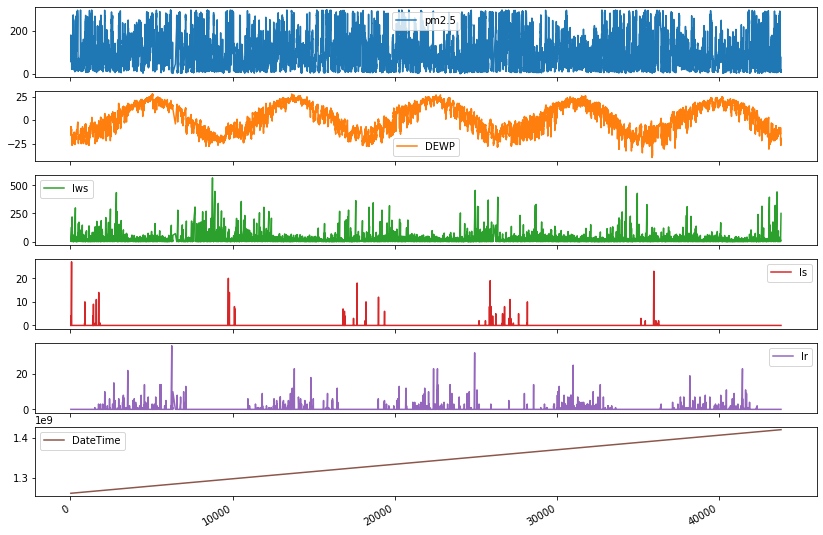

In [27]:
df.plot(subplots=True, figsize=(14,10))

In [8]:
!pip install P4J

     |████████████████████████████████| 510 kB 42 kB/s eta 0:00:01
  Created wheel for P4J: filename=P4J-0.27-cp37-cp37m-linux_x86_64.whl size=1452005 sha256=91dee07138db8f0c63bb76943e9b04140e3ed968c80bfe934fa1eb8a7eced312
  Stored in directory: /home/sidney/.cache/pip/wheels/87/74/86/60f6b49a45802917f989d8f980d93bb39b39d1ce1ab702c107
Successfully built P4J


In [9]:
from __future__ import division
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import P4J
print("P4J version:")
print(P4J.__version__)

P4J version:
0.27


### Split Dataset into training and test data - To generate it sequentially as time is important, we kept 'Shuffle=False'

In [18]:
from sklearn.model_selection import train_test_split

# input columns
X=df[['DateTime', 'DEWP','Iws','Is','Ir']]
# X = df.drop(['pm2.5'], axis=1) or use this easily
# Column to predict-output
y=df['pm2.5']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42,shuffle= False)

X_train.shape,y_train.shape,X_test.shape,y_test.shape

((31968, 5), (31968,), (7992, 5), (7992,))

# 3- Machine Learninig Model

In [ ]:
def build_cnn_model(activation, input_shape):
    model = Sequential()
    
    # 2 Convolution layer with Max polling
    model.add(Conv2D(32, 5, activation = activation, padding = 'same', input_shape = input_shape))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, 5, activation = activation, padding = 'same', kernel_initializer = "he_normal"))
    model.add(MaxPooling2D())  
    model.add(Flatten())
    
    # 3 Full connected layer
    model.add(Dense(128, activation = activation, kernel_initializer = "he_normal"))
    model.add(Dense(54, activation = activation, kernel_initializer = "he_normal"))
    model.add(Dense(6, activation = 'softmax')) # 6 classes
    
    # summarize the model
    print(model.summary())
    return model

In [ ]:
def compile_and_fit_model(model, X_train, y_train, X_test, y_test, batch_size, n_epochs):

    # compile the model
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='sparse_categorical_crossentropy',
        metrics=['sparse_categorical_accuracy'])
    
    # define callbacks
    callbacks = [ModelCheckpoint(filepath='best_model.h5', monitor='val_sparse_categorical_accuracy', save_best_only=True)]
    
    # fit the model
    history = model.fit(x=X_train,
                        y=y_train,
                        batch_size=batch_size,
                        epochs=n_epochs,
                        verbose=1,
                        callbacks=callbacks,
                        validation_data=(X_test, y_test))
    
    return model, history

In [ ]:
# shape of the input images
input_shape = (X_train_cwt.shape[1], X_train_cwt.shape[2], X_train_cwt.shape[3])

# create cnn model
cnn_model = build_cnn_model("relu", input_shape)

In [ ]:
def plot_model_performance_curves(history):
    fig = plt.figure(figsize=(12,5))

    # plot Cross Entropy loss
    ax = fig.add_subplot(121)
    ax.plot(history.history['loss'], color='dodgerblue', label='train loss')
    ax.plot(history.history['val_loss'], color = 'deepskyblue', label='val loss')
    ax.legend()
    ax.set_title('Learning Curves')
    ax.set_ylabel('Cross Entropy')
    ax.set_xlabel('Epoch')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # plot classification accuracy
    ax = fig.add_subplot(122)
    ax.plot(history.history['sparse_categorical_accuracy'], color='dodgerblue', label='train accuracy')
    ax.plot(history.history['val_sparse_categorical_accuracy'], color = 'deepskyblue', label='val accuracy')
    ax.legend()
    ax.set_title('Accuracy Curves')
    ax.set_ylabel('Categorical Accuracy')
    ax.set_xlabel('Epoche')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.tight_layout()
    plt.show()


plot_model_performance_curves(cnn_history)

### Visualisation Accuracy-Loss

# 4- Deep Learning Model

### Visualisation Accuracy-Loss

# 5- Evaluation

f1-score vs bak

In [ ]:
def create_confusion_matrix(y_pred, y_test):    
    #calculate the confusion matrix
    confmat = confusion_matrix(y_true=y_test, y_pred=y_pred)
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax.imshow(confmat, cmap=plt.cm.Blues, alpha=0.5)

    n_labels = len(LABEL_NAMES)
    ax.set_xticks(np.arange(n_labels))
    ax.set_yticks(np.arange(n_labels))
    ax.set_xticklabels(LABEL_NAMES)
    ax.set_yticklabels(LABEL_NAMES)

    # rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    # loop over data dimensions and create text annotations.
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=i, y=j, s=confmat[i, j], va='center', ha='center')
    
    # avoid that the first and last row cut in half
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    
    ax.set_title("Confusion Matrix")
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')

    plt.tight_layout()
    plt.show()

# make predictions for test data
y_pred = trained_cnn_model.predict_classes(X_test_cwt)
# determine the total accuracy 
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

create_confusion_matrix(y_pred, y_test)

# 6- Result - Comments

# 7- Libraries

- pandas
- numpy
- 

links: 
- https://towardsdatascience.com/a-complete-guide-to-time-series-data-visualization-in-python-da0ddd2cfb01

notlar: 200123_CWT_Examples bak!!!